In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
SiteId = 2

In [3]:
df_pm25 = pd.read_csv('data/pm25_processed.csv', low_memory=False)
df_pm25

,SiteId,SiteName,PublishTime,AQI,SO2,SO2_AVG,CO,CO_8hr,O3,O3_8hr,NO2,NOx,NO,PM10,PM10_AVG,PM2.5,PM2.5_AVG,WindSpeed,WindDirec,Pollutant
0,58,小港,2021-01-01 00:00:00,90.0,4.0,4.0,0.56,0.7,2.0,2.0,30.0,40.5,10.5,70.0,69.0,31.0,31.0,1.4,359.0,細懸浮微粒
1,57,前鎮,2021-01-01 00:00:00,92.0,2.2,2.0,0.59,0.7,2.4,2.0,26.0,33.0,7.0,62.0,70.0,30.0,32.0,1.9,13.0,細懸浮微粒
2,56,前金,2021-01-01 00:00:00,96.0,1.1,2.0,0.46,0.5,6.6,6.0,22.5,25.6,3.1,53.0,67.0,32.0,34.0,2.2,342.0,細懸浮微粒
3,54,左營,2021-01-01 00:00:00,85.0,2.6,3.0,0.42,0.5,7.3,6.0,21.3,22.7,1.4,54.0,65.0,27.0,29.0,2.2,23.0,細懸浮微粒
4,53,楠梓,2021-01-01 00:00:00,85.0,1.9,2.0,0.40,0.4,8.2,8.0,18.8,21.7,2.9,49.0,60.0,31.0,29.0,2.5,336.0,細懸浮微粒
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078239,32,西屯,2022-10-28 00:00:00,31.0,0.9,1.0,0.14,0.1,32.0,34.9,5.5,5.9,0.4,17.0,24.0,6.0,8.0,2.6,23.0,UNKNOWN
2078240,35,二林,2022-10-28 00:00:00,38.0,1.7,2.0,0.18,0.2,26.3,33.0,6.3,6.4,0.0,23.0,38.0,9.0,10.0,1.5,27.0,UNKNOWN
2078241,25,頭份,2022-10-28 00:00:00,31.0,1.6,1.0,0.14,0.1,35.7,33.6,5.0,6.3,1.3,12.0,21.0,4.0,4.0,3.0,68.0,UNKNOWN
2078242,29,沙鹿,2022-10-28 00:00:00,29.0,2.0,2.0,0.19,0.2,26.5,31.1,9.2,10.2,0.9,18.0,26.0,4.0,7.0,1.8,5.0,UNKNOWN


In [4]:
## choose specific place
df_place1 = df_pm25[df_pm25.SiteId == 2]
df_place1.drop_duplicates("PublishTime", inplace=True)
df_place1

/tmp/ipykernel_3854614/2323138249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_place1.drop_duplicates("PublishTime", inplace=True)


,SiteId,SiteName,PublishTime,AQI,SO2,SO2_AVG,CO,CO_8hr,O3,O3_8hr,NO2,NOx,NO,PM10,PM10_AVG,PM2.5,PM2.5_AVG,WindSpeed,WindDirec,Pollutant
79,2,汐止,2021-01-01 00:00:00,54.0,1.6,1.0,0.33,0.3,22.5,26.0,14.0,14.6,0.6,28.0,28.0,19.0,17.0,1.0,31.0,細懸浮微粒
154,2,汐止,2021-01-01 01:00:00,55.0,1.6,1.0,0.31,0.3,20.2,25.0,14.5,14.5,0.0,31.0,28.0,18.0,17.0,1.4,32.0,細懸浮微粒
383,2,汐止,2021-01-01 02:00:00,54.0,0.5,1.0,0.30,0.3,22.3,25.0,10.2,10.9,0.8,23.0,27.0,15.0,17.0,1.9,36.0,細懸浮微粒
479,2,汐止,2021-01-01 03:00:00,52.0,0.5,1.0,0.25,0.3,27.9,25.0,6.7,7.6,0.9,22.0,26.0,12.0,16.0,2.9,43.0,細懸浮微粒
624,2,汐止,2021-01-01 04:00:00,50.0,0.5,1.0,0.27,0.3,23.5,25.0,9.1,10.3,1.2,22.0,25.0,15.0,15.0,2.5,32.0,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077945,2,汐止,2022-10-27 20:00:00,28.0,0.9,0.0,0.26,0.1,23.2,30.1,15.3,16.3,1.0,20.0,22.0,8.0,6.0,1.5,64.0,UNKNOWN
2077973,2,汐止,2022-10-27 21:00:00,26.0,0.8,0.0,0.21,0.1,24.7,28.1,13.0,14.0,1.0,21.0,21.0,7.0,6.0,1.3,68.0,UNKNOWN
2078082,2,汐止,2022-10-27 22:00:00,24.0,0.7,0.0,0.16,0.1,27.2,26.5,10.5,11.1,0.5,18.0,21.0,7.0,6.0,1.8,30.0,UNKNOWN
2078167,2,汐止,2022-10-27 23:00:00,24.0,1.2,0.0,0.15,0.1,26.8,26.5,9.3,9.5,0.2,13.0,19.0,4.0,6.0,2.2,20.0,UNKNOWN


In [5]:
df_place1 = df_place1.set_index('PublishTime', inplace=False)
df_place1

,SiteId,SiteName,AQI,SO2,SO2_AVG,CO,CO_8hr,O3,O3_8hr,NO2,NOx,NO,PM10,PM10_AVG,PM2.5,PM2.5_AVG,WindSpeed,WindDirec,Pollutant
PublishTime,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,2,汐止,54.0,1.6,1.0,0.33,0.3,22.5,26.0,14.0,14.6,0.6,28.0,28.0,19.0,17.0,1.0,31.0,細懸浮微粒
2021-01-01 01:00:00,2,汐止,55.0,1.6,1.0,0.31,0.3,20.2,25.0,14.5,14.5,0.0,31.0,28.0,18.0,17.0,1.4,32.0,細懸浮微粒
2021-01-01 02:00:00,2,汐止,54.0,0.5,1.0,0.30,0.3,22.3,25.0,10.2,10.9,0.8,23.0,27.0,15.0,17.0,1.9,36.0,細懸浮微粒
2021-01-01 03:00:00,2,汐止,52.0,0.5,1.0,0.25,0.3,27.9,25.0,6.7,7.6,0.9,22.0,26.0,12.0,16.0,2.9,43.0,細懸浮微粒
2021-01-01 04:00:00,2,汐止,50.0,0.5,1.0,0.27,0.3,23.5,25.0,9.1,10.3,1.2,22.0,25.0,15.0,15.0,2.5,32.0,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27 20:00:00,2,汐止,28.0,0.9,0.0,0.26,0.1,23.2,30.1,15.3,16.3,1.0,20.0,22.0,8.0,6.0,1.5,64.0,UNKNOWN
2022-10-27 21:00:00,2,汐止,26.0,0.8,0.0,0.21,0.1,24.7,28.1,13.0,14.0,1.0,21.0,21.0,7.0,6.0,1.3,68.0,UNKNOWN
2022-10-27 22:00:00,2,汐止,24.0,0.7,0.0,0.16,0.1,27.2,26.5,10.5,11.1,0.5,18.0,21.0,7.0,6.0,1.8,30.0,UNKNOWN


In [6]:
# convert index to datetime object
df_place1.index = pd.to_datetime(df_place1.index)
df_place1.index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 01:00:00',
               '2021-01-01 02:00:00', '2021-01-01 03:00:00',
               '2021-01-01 04:00:00', '2021-01-01 05:00:00',
               '2021-01-01 06:00:00', '2021-01-01 07:00:00',
               '2021-01-01 08:00:00', '2021-01-01 09:00:00',
               ...
               '2022-10-27 13:00:00', '2022-10-27 14:00:00',
               '2022-10-27 17:00:00', '2022-10-27 18:00:00',
               '2022-10-27 19:00:00', '2022-10-27 20:00:00',
               '2022-10-27 21:00:00', '2022-10-27 22:00:00',
               '2022-10-27 23:00:00', '2022-10-28 00:00:00'],
              dtype='datetime64[ns]', name='PublishTime', length=14229, freq=None)

<Axes: xlabel='PublishTime'>

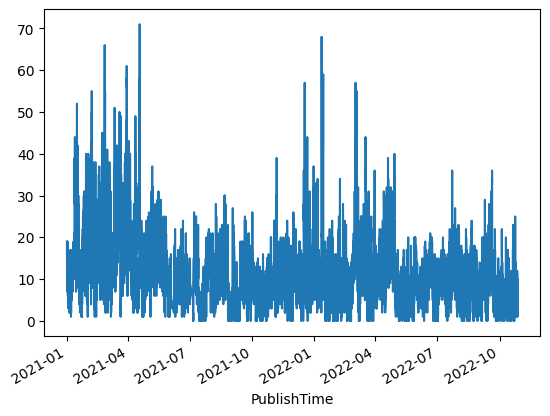

In [7]:
# explore relationship between wind AQI and PM2.5 
df_daily1 = df_place1[df_place1.index.strftime('%Y-%m-%d') < '2023-1-1']
df_daily1['PM2.5'].plot()

/tmp/ipykernel_3854614/3889316957.py:8: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(-len(df_daily1['PM2.5'])+1, len(df_daily1['PM2.5'])), acf_values, use_line_collection=True)


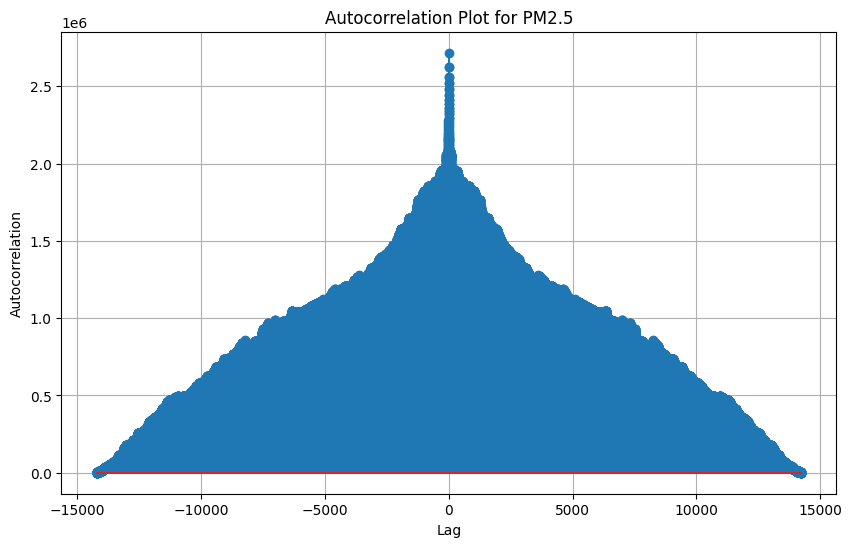

In [8]:
# exam the Autocorrelation of PM2.5

# 計算 PM2.5 的自相關係數
acf_values = np.correlate(df_daily1['PM2.5'], df_daily1['PM2.5'], mode='full')

# 繪製自相關圖
plt.figure(figsize=(10, 6))
plt.stem(range(-len(df_daily1['PM2.5'])+1, len(df_daily1['PM2.5'])), acf_values, use_line_collection=True)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot for PM2.5')
plt.grid(True)
plt.show()

In [9]:
df_daily1['PM1hour'] = df_daily1['PM2.5'].shift(periods=-1)
df_daily1['PM2hour'] = df_daily1['PM2.5'].shift(periods=-2)
df_daily1['PM3hour'] = df_daily1['PM2.5'].shift(periods=-3)
# df_daily1['PM-1hour'] = df_daily1['PM2.5'].shift(periods=1)
# df_daily1['PM-2hour'] = df_daily1['PM2.5'].shift(periods=2)
# df_daily1['PM-3hour'] = df_daily1['PM2.5'].shift(periods=3)
df_daily1

,SiteId,SiteName,AQI,SO2,SO2_AVG,CO,CO_8hr,O3,O3_8hr,NO2,...,PM10,PM10_AVG,PM2.5,PM2.5_AVG,WindSpeed,WindDirec,Pollutant,PM1hour,PM2hour,PM3hour
PublishTime,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,2,汐止,54.0,1.6,1.0,0.33,0.3,22.5,26.0,14.0,...,28.0,28.0,19.0,17.0,1.0,31.0,細懸浮微粒,18.0,15.0,12.0
2021-01-01 01:00:00,2,汐止,55.0,1.6,1.0,0.31,0.3,20.2,25.0,14.5,...,31.0,28.0,18.0,17.0,1.4,32.0,細懸浮微粒,15.0,12.0,15.0
2021-01-01 02:00:00,2,汐止,54.0,0.5,1.0,0.30,0.3,22.3,25.0,10.2,...,23.0,27.0,15.0,17.0,1.9,36.0,細懸浮微粒,12.0,15.0,11.0
2021-01-01 03:00:00,2,汐止,52.0,0.5,1.0,0.25,0.3,27.9,25.0,6.7,...,22.0,26.0,12.0,16.0,2.9,43.0,細懸浮微粒,15.0,11.0,11.0
2021-01-01 04:00:00,2,汐止,50.0,0.5,1.0,0.27,0.3,23.5,25.0,9.1,...,22.0,25.0,15.0,15.0,2.5,32.0,UNKNOWN,11.0,11.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27 20:00:00,2,汐止,28.0,0.9,0.0,0.26,0.1,23.2,30.1,15.3,...,20.0,22.0,8.0,6.0,1.5,64.0,UNKNOWN,7.0,7.0,4.0
2022-10-27 21:00:00,2,汐止,26.0,0.8,0.0,0.21,0.1,24.7,28.1,13.0,...,21.0,21.0,7.0,6.0,1.3,68.0,UNKNOWN,7.0,4.0,9.0
2022-10-27 22:00:00,2,汐止,24.0,0.7,0.0,0.16,0.1,27.2,26.5,10.5,...,18.0,21.0,7.0,6.0,1.8,30.0,UNKNOWN,4.0,9.0,NaN


In [10]:
#use ffiil to fill the nan value
df_daily1 = df_daily1.fillna(method='ffill')

In [11]:
# df_daily1['PM2.51hChange'] = df_daily1.apply(lambda x: x.PM3hour - x['PM2.5'] if ((not pd.isna(x.PM1hour)) and (not pd.isna(x['PM2.5']))) else np.nan, axis=1)
# df_daily1['PM2.52hChange'] = df_daily1.apply(lambda x: x.PM3hour - x['PM2.5'] if ((not pd.isna(x.PM2hour)) and (not pd.isna(x['PM2.5']))) else np.nan, axis=1)
# df_daily1['PM2.53hChange'] = df_daily1.apply(lambda x: x.PM3hour - x['PM2.5'] if ((not pd.isna(x.PM3hour)) and (not pd.isna(x['PM2.5']))) else np.nan, axis=1)
df_daily1.drop(columns=['WindSpeed', 'WindDirec', 'Pollutant'], inplace=True)
df_daily1.to_json('data/pm25_changed.json', indent=4)


/tmp/ipykernel_3854614/2972007787.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_daily1.corr(), annot=True, ax=ax, cmap='coolwarm')


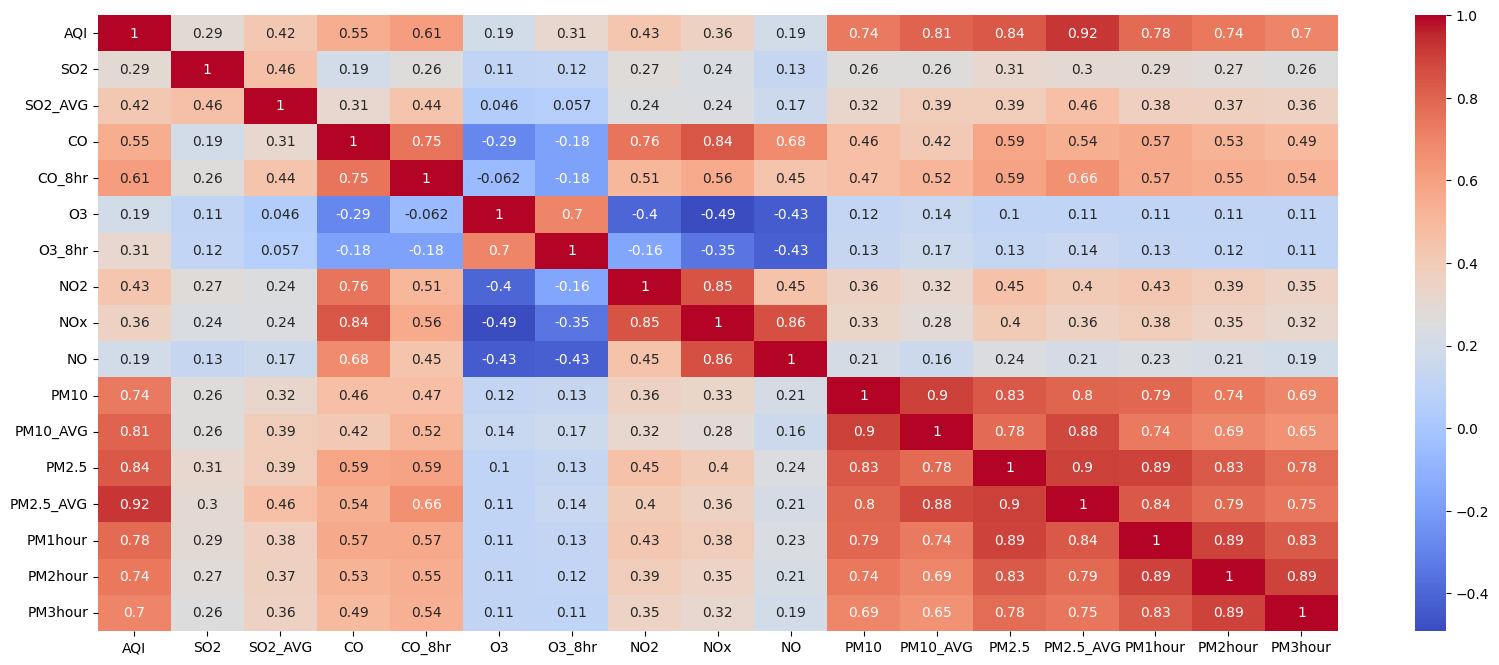

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot coefficient relationship heatmap
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df_daily1.corr(), annot=True, ax=ax, cmap='coolwarm')
plt.savefig('images/heatmap_region.png')
plt.show()

In [13]:
# x1:PM10
X1 = df_daily1['PM10'].to_numpy()
# x2:
X2 = df_daily1['AQI'].to_numpy()
# x3:SO2
X3 = df_daily1['PM10_AVG'].to_numpy()
# x4:NO2
X4 = df_daily1['PM2.5_AVG'].to_numpy()
# x5:CO
X5 = df_daily1['PM2.5'].to_numpy()
# observation
Y1 = df_daily1['PM1hour'].to_numpy()
Y2 = df_daily1['PM2hour'].to_numpy()
Y3 = df_daily1['PM3hour'].to_numpy()

In [ ]:
X1.shape

(14229,)

## Model 1

In [15]:
import pymc3 as pm

with pm.Model() as pm25_model:
    alpha1 = pm.Normal('alpha1', mu=0, sd=10)
    alpha2 = pm.Normal('alpha2', mu=0, sd=10)
    alpha3 = pm.Normal('alpha3', mu=0, sd=10)
    alpha4 = pm.Normal('alpha4', mu=0, sd=10)
    alpha5 = pm.Normal('alpha5', mu=0, sd=10)
    c = pm.Normal('c', mu=0, sd=30)
    
    sigma = pm.HalfCauchy('sigma', beta=10)
    
    mu1 = alpha1 * X1 + alpha2 * X2 + alpha3 * X3 + alpha4 * X4 + alpha5 * X5 + c
    mu2 = alpha1 * X1 + alpha2 * X2 + alpha3 * X3 + alpha4 * X4 + alpha5 * X5 + c
    mu3 = alpha1 * X1 + alpha2 * X2 + alpha3 * X3 + alpha4 * X4 + alpha5 * X5 + c
    
    Y_obs1 = pm.Normal('Y_obs1', mu=mu1, sd=sigma, observed=Y1)
    Y_obs2 = pm.Normal('Y_obs2', mu=mu2, sd=sigma, observed=Y2)
    Y_obs3 = pm.Normal('Y_obs3', mu=mu3, sd=sigma, observed=Y3)

# pm25_model = pm.set_data({
#     'X1': X1_shared,
#     'X2': X2_shared,
#     'X3': X3_shared,
#     'X4': X4_shared,
#     'X5': X5_shared,
#     'Y_obs': Y_shared
# }, model=pm25_model)

In [16]:
with pm25_model:
    trace = pm.sample(3000, tune=1500, target_accept=0.9)

/home/ncu111527003/anaconda3/envs/pm2.5/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, c, alpha5, alpha4, alpha3, alpha2, alpha1]


Sampling 4 chains for 1_500 tune and 3_000 draw iterations (6_000 + 12_000 draws total) took 143 seconds.


In [17]:
# from tqdm import tqdm

with pm25_model:
    posterior_pred = pm.sample_posterior_predictive(trace)
    prior = pm.sample_prior_predictive()
    y_pred_1hour = posterior_pred['Y_obs1'].mean(axis=0).round(1)
    y_pred_2hour = posterior_pred['Y_obs2'].mean(axis=0).round(1)
    y_pred_3hour = posterior_pred['Y_obs3'].mean(axis=0).round(1)

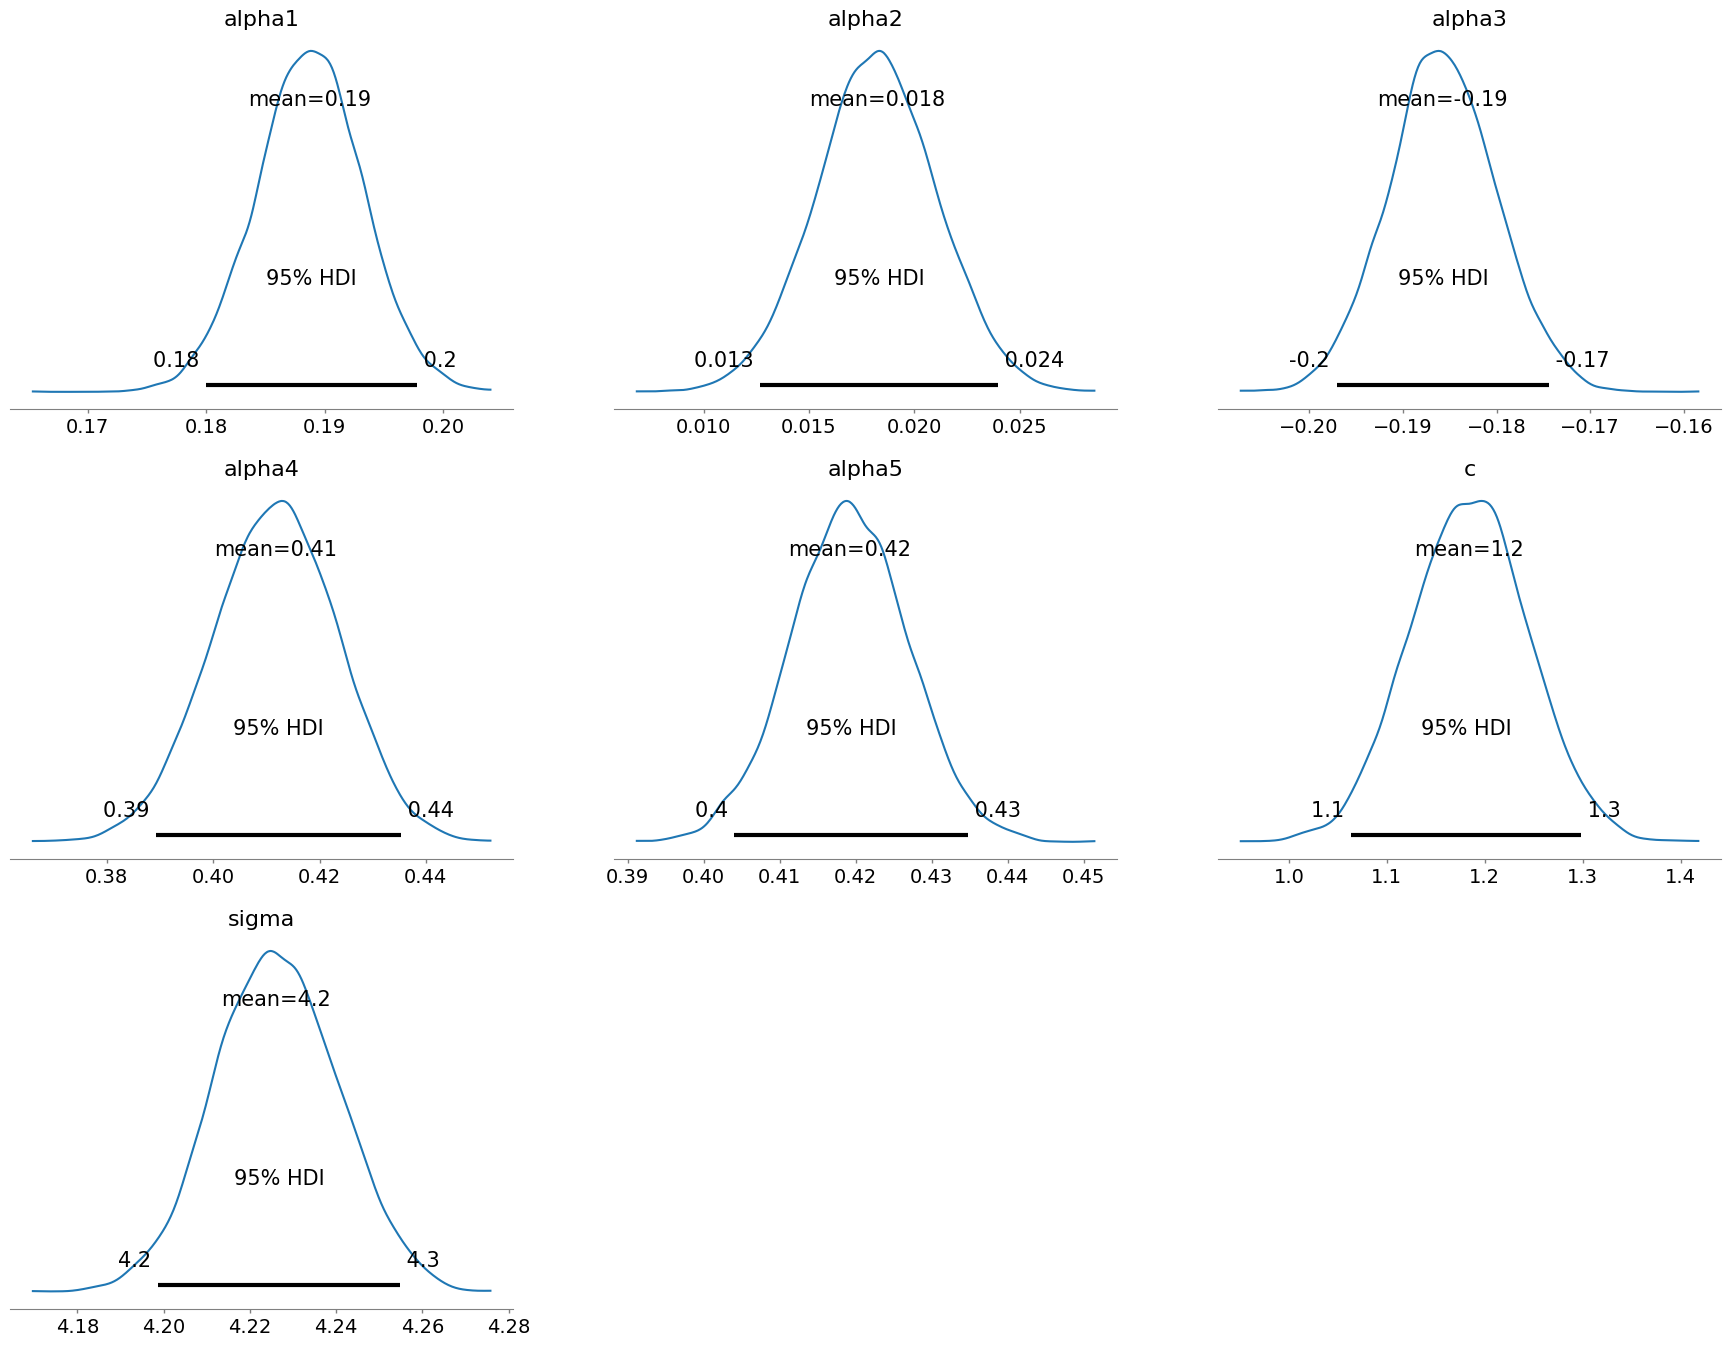

In [133]:
import arviz as az
import pickle

with pm25_model:
    data = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_pred)

with open("models/model"+ str(SiteId), 'wb') as buff:
    pickle.dump({'model': pm25_model, 'trace': trace}, buff)
az.plot_posterior(data, round_to=2, hdi_prob=0.95)
plt.savefig('images/posterior_plot.png')

In [19]:
# print(data.posterior.sigma.mean())

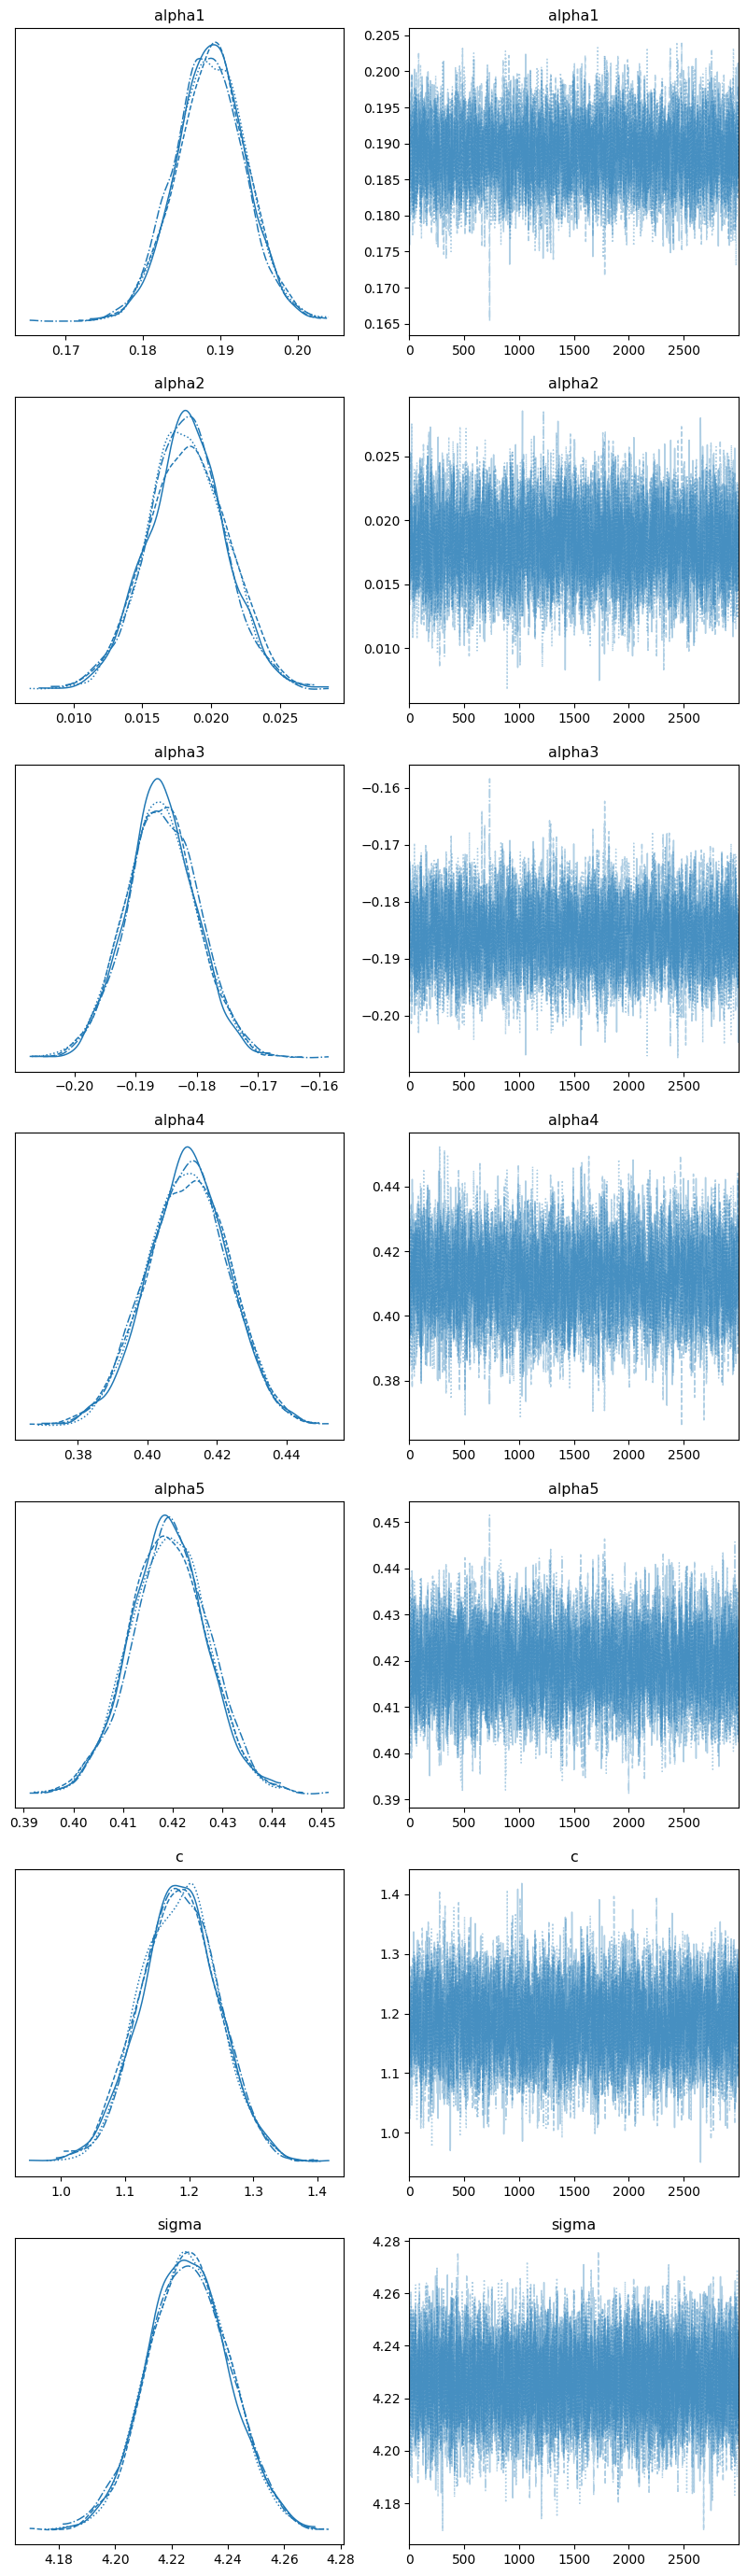

In [20]:
az.plot_trace(data, figsize=(10, 35))
plt.savefig('images/trace_plot.png')

In [108]:
# 将预测值添加到DataFrame中
df_daily1['Y_pred_1hour'] = y_pred_1hour
df_daily1['Y_pred_2hour'] = y_pred_2hour
df_daily1['Y_pred_3hour'] = y_pred_3hour

df_daily1['prediction'] = df_daily1['Y_pred_1hour'].astype(str) + ' ' + df_daily1['Y_pred_2hour'].astype(str) + ' ' + df_daily1['Y_pred_3hour'].astype(str)

df_daily1[["SiteName", 'PM2.5', 'prediction']].to_csv('data/pm25_prediction2.csv', index=True)
# df_combined[[ 'PM2.5', 'Y_pred_1hour', 'Y_pred_2hour', 'Y_pred_3hour']][28400:]
# df_combined["SiteId", 'PM2.5', 'Y_pred_1hour', 'Y_pred_2hour', 'Y_pred_3hour']#.to_json('data/pm25_prediction.json', indent=4)

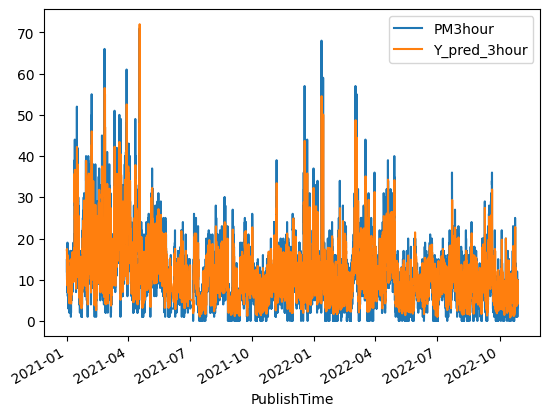

<Figure size 640x480 with 0 Axes>

In [140]:
df_daily1['PM3hour'].plot()
df_daily1['Y_pred_3hour'].plot()
plt.legend()
plt.show()
plt.savefig('images/prediction1.png')

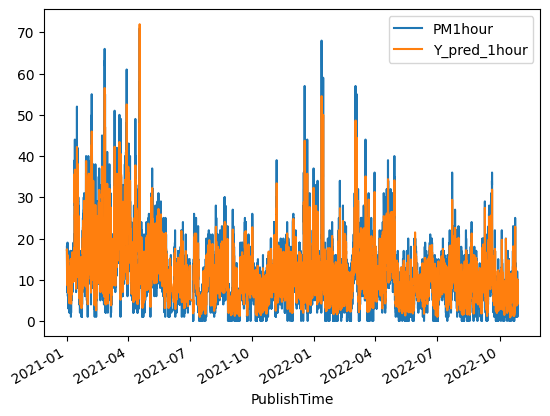

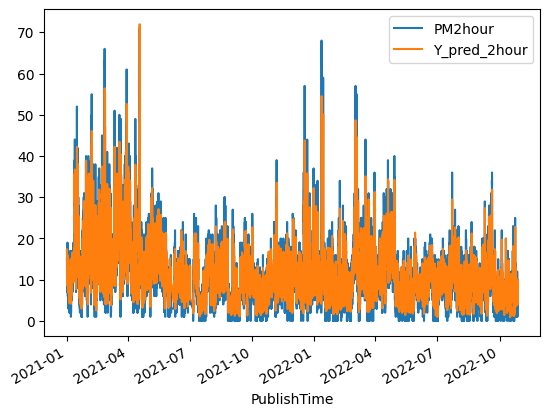

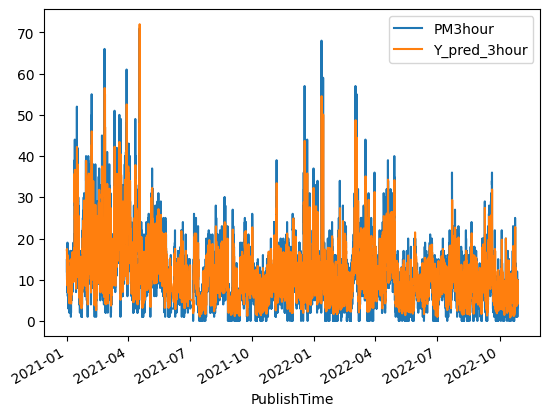

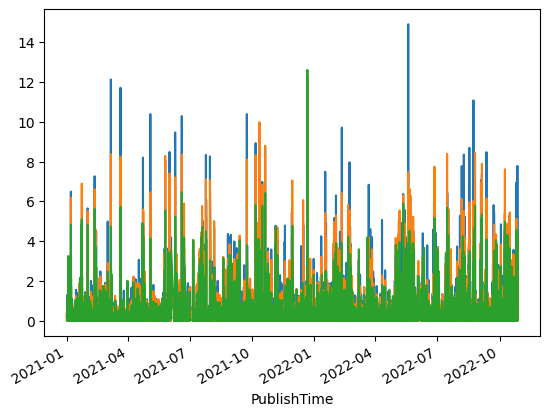

In [146]:
siteid = 2
for i in range(1,4):
    df_daily1[f'PM{i}hour'].plot()
    df_daily1[f'Y_pred_{i}hour'].plot()
    plt.legend()
    plt.savefig(f'images/prediction{i}hr{siteid}.png')
    plt.show()

    df_daily1[f'error{i}'] = df_daily1.apply(lambda x: abs(x[f'PM{i}hour']-x[f'Y_pred_{i}hour'])/x[f'PM{i}hour'] if x[f'PM{i}hour']!= 0 else np.mean(x[f'PM{i}hour']), axis=1)

df_daily1['error3'].plot()
df_daily1['error2'].plot()
df_daily1['error1'].plot()
plt.savefig(f'images/error.png')

In [112]:
df_daily1['error'].describe()

count    14229.000000
mean         0.318663
std          0.504265
min          0.000000
25%          0.083684
50%          0.189091
75%          0.352500
max         12.600000
Name: error, dtype: float64

In [113]:
from sklearn.metrics import mean_squared_error

df_daily1.dropna(inplace=True)
# 從 DataFrame 中獲取 true label 和 prediction 列轉換為 NumPy 陣列
true_label1 = df_daily1['PM1hour'].to_numpy()
prediction1 = df_daily1['Y_pred_1hour'].to_numpy()
true_label2 = df_daily1['PM2hour'].to_numpy()
prediction2 = df_daily1['Y_pred_2hour'].to_numpy()
true_label3 = df_daily1['PM3hour'].to_numpy()
prediction3 = df_daily1['Y_pred_3hour'].to_numpy()

# 計算 MSE
mse_score1 = mean_squared_error(true_label1, prediction1)
mse_score2 = mean_squared_error(true_label2, prediction2)
mse_score3 = mean_squared_error(true_label3, prediction3)
print("MSE Score1:", mse_score1)
print("MSE Score2:", mse_score2)
print("MSE Score3:", mse_score3)
print("MSE Score:", (mse_score1 + mse_score2 + mse_score3)/3)

MSE Score1: 11.808378677349076
MSE Score2: 18.262630873568064
MSE Score3: 23.502010021786493
MSE Score: 17.85767319090121
